# Import Dataset

In [418]:
import pandas as pd
import numpy as np

In [419]:
df = pd.read_csv('AdmissionPredict.csv')

In [420]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4,4.0,4.5,8.87,1,NaN
2,3,316.0,NaN,3,3.0,3.5,8.00,1,0.72
3,4,NaN,110.0,3,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2,2.0,3.0,8.21,0,0.65


In [421]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,378.000000,380.000000,400.000000,400.000000,400.000000,380.000000,400.000000,384.000000
mean,200.500000,316.759259,107.386842,3.087500,3.400000,3.452500,8.604737,0.547500,0.724375
std,115.614301,11.415599,6.048645,1.143728,1.006869,0.898478,0.599167,0.498362,0.142964
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.250000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.640000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.080000,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          378 non-null    float64
 2   TOEFL Score        380 non-null    float64
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               380 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    384 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 28.2 KB


# Data Exploratory Analysis

## Dealing With Missing Data
Let's see which column has NaN values : 

In [423]:
df.isnull().sum()

Serial No.            0
GRE Score            22
TOEFL Score          20
University Rating     0
SOP                   0
LOR                   0
CGPA                 20
Research              0
Chance of Admit      16
dtype: int64

Let's drop NaN values in Chance of Admit column:

In [424]:
df = df[df['Chance of Admit'].notna()]
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92
2,3,316.0,NaN,3,3.0,3.5,8.00,1,0.72
3,4,NaN,110.0,3,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2,2.0,3.0,8.21,0,0.65
5,6,330.0,115.0,5,4.5,3.0,9.34,1,0.90
...,...,...,...,...,...,...,...,...,...
394,395,329.0,111.0,4,4.5,4.0,9.23,1,0.89
395,396,324.0,110.0,3,3.5,3.5,9.04,1,0.82
397,398,330.0,116.0,4,5.0,4.5,9.45,1,0.91
398,399,312.0,103.0,3,3.5,4.0,8.78,0,0.67


## For filling NaN vlues, we have 2 options:

1) Filling with median vlue of each column:

In [425]:
# we have missing data, only in 'GRE Score', 'TOEFL Score' and 'CGPA' columns.
temp_df_nonan = df.copy()
temp_df_nonan['GRE Score'].replace(np.nan, temp_df_nonan['GRE Score'].median(), inplace=True)
temp_df_nonan['TOEFL Score'].replace(np.nan, temp_df_nonan['TOEFL Score'].median(), inplace=True)
temp_df_nonan['CGPA'].replace(np.nan, temp_df_nonan['CGPA'].median(), inplace=True)
temp_df_nonan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         384 non-null    int64  
 1   GRE Score          384 non-null    float64
 2   TOEFL Score        384 non-null    float64
 3   University Rating  384 non-null    int64  
 4   SOP                384 non-null    float64
 5   LOR                384 non-null    float64
 6   CGPA               384 non-null    float64
 7   Research           384 non-null    int64  
 8   Chance of Admit    384 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 30.0 KB


2) Finding correlation and filling with mean of subset of each column: (we choose this method for other parts)

### GRE Score

In [426]:
df.corr()['GRE Score'].drop('GRE Score').sort_values(ascending = False)

TOEFL Score          0.840993
CGPA                 0.830727
Chance of Admit      0.805076
University Rating    0.671549
SOP                  0.620963
Research             0.588385
LOR                  0.556729
Serial No.          -0.105022
Name: GRE Score, dtype: float64

We will group the dataframe by University Rating(Because there's a high correlation between ) and calculate the average value for GRE Score per University Rating

In [427]:
Per_UR = df.groupby('University Rating').mean()['GRE Score']
Per_UR

University Rating
1    303.520000
2    309.410526
3    315.790323
4    324.671875
5    328.642857
Name: GRE Score, dtype: float64

In [428]:
def fill_nan(uni_rating, second) :
  if np.isnan(second) : 
    return Per_UR[uni_rating]
  else :
    return second

df['GRE Score'] = df.apply(lambda row : fill_nan(row['University Rating'],row['GRE Score']),axis = 1)

In [429]:
df.isnull().sum()

Serial No.            0
GRE Score             0
TOEFL Score          19
University Rating     0
SOP                   0
LOR                   0
CGPA                 20
Research              0
Chance of Admit       0
dtype: int64

### TOEFL Score Column

In [430]:
df.corr()['TOEFL Score'].drop('TOEFL Score').sort_values(ascending = False)

GRE Score            0.834685
CGPA                 0.828364
Chance of Admit      0.783667
University Rating    0.689511
SOP                  0.647810
LOR                  0.556272
Research             0.509609
Serial No.          -0.153994
Name: TOEFL Score, dtype: float64

In [431]:
Per_UR = df.groupby('University Rating').mean()['TOEFL Score']
Per_UR

University Rating
1     99.240000
2    103.729167
3    107.000000
4    111.530303
5    113.800000
Name: TOEFL Score, dtype: float64

In [432]:
df['TOEFL Score'] = df.apply(lambda row : fill_nan(row['University Rating'],row['TOEFL Score']),axis = 1)

In [433]:
df.isnull().sum()

Serial No.            0
GRE Score             0
TOEFL Score           0
University Rating     0
SOP                   0
LOR                   0
CGPA                 20
Research              0
Chance of Admit       0
dtype: int64

### CGPA Column

In [434]:
df.corr()['CGPA'].drop('CGPA').sort_values(ascending = False)

Chance of Admit      0.872492
GRE Score            0.824538
TOEFL Score          0.824481
University Rating    0.750312
SOP                  0.720422
LOR                  0.669002
Research             0.527005
Serial No.          -0.058785
Name: CGPA, dtype: float64

In [435]:
Per_UR = df.groupby('University Rating').mean()['CGPA']
Per_UR

University Rating
1    7.750000
2    8.196064
3    8.550000
4    9.020746
5    9.316909
Name: CGPA, dtype: float64

In [436]:
df['CGPA'] = df.apply(lambda row : fill_nan(row['University Rating'],row['CGPA']),axis = 1)

In [437]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Scatterplot

In [438]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Serial No.', ylabel='Chance of Admit'>

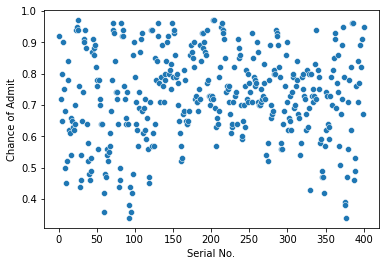

In [439]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'Serial No.')

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit'>

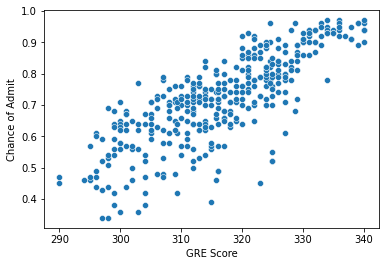

In [440]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'GRE Score')

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit'>

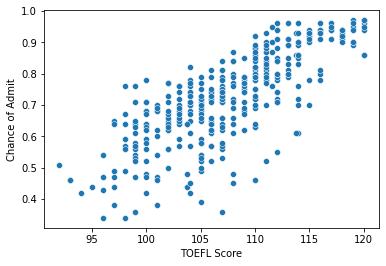

In [441]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'TOEFL Score')

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit'>

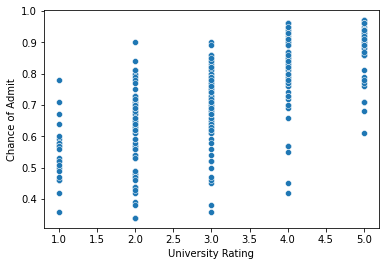

In [442]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'University Rating')

<AxesSubplot:xlabel='SOP', ylabel='Chance of Admit'>

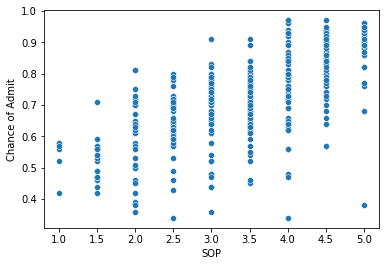

In [443]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'SOP')

<AxesSubplot:xlabel='LOR ', ylabel='Chance of Admit'>

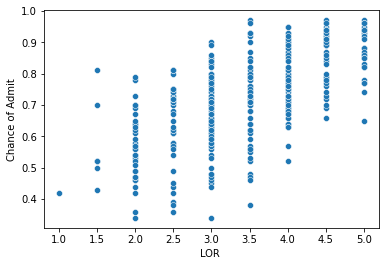

In [448]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'LOR ')

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit'>

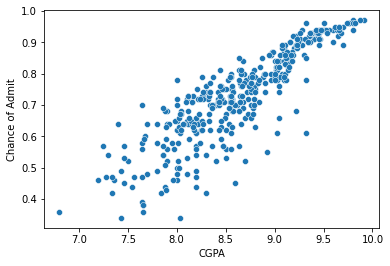

In [444]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'CGPA')

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit'>

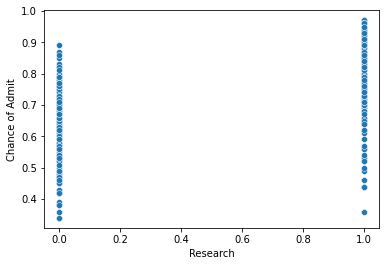

In [445]:
sns.scatterplot(data = df, y = 'Chance of Admit', x = 'Research')

It seems **CGPA** correlates more with Chance of Admission. if you ignore noisy points in plot, you can fit a straight line to example points of dataset in plot, approximately.

# Training the model

## Train / Test Split

In [449]:
from sklearn.model_selection import train_test_split

In [450]:
X = df.drop(['Serial No.','Chance of Admit'],axis = 1)
y = df['Chance of Admit']

In [451]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling

In [452]:
from sklearn.preprocessing import MinMaxScaler

In [453]:
scaler = MinMaxScaler()

In [454]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train_mat = np.c_[np.ones(X_train.shape[0]), X_train['CGPA']]
X_test_mat = np.c_[np.ones(X_test.shape[0]), X_test['CGPA']]

X_train_mat_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled['CGPA']]
X_test_mat_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled['CGPA']]

In [455]:
X_train_mat_scaled

array([[1.        , 0.28782288],
       [1.        , 0.49815498],
       [1.        , 0.46125461],
       [1.        , 0.29520295],
       [1.        , 0.25461255],
       [1.        , 0.17343173],
       [1.        , 0.3800738 ],
       [1.        , 0.72693727],
       [1.        , 0.74538745],
       [1.        , 0.16236162],
       [1.        , 0.53505535],
       [1.        , 0.37638376],
       [1.        , 0.53505535],
       [1.        , 0.39483395],
       [1.        , 0.29520295],
       [1.        , 0.74538745],
       [1.        , 0.73062731],
       [1.        , 0.29520295],
       [1.        , 0.25830258],
       [1.        , 0.58302583],
       [1.        , 0.31734317],
       [1.        , 0.16236162],
       [1.        , 0.46863469],
       [1.        , 0.67896679],
       [1.        , 0.64944649],
       [1.        , 0.96678967],
       [1.        , 0.50553506],
       [1.        , 0.36900369],
       [1.        , 0.84870849],
       [1.        , 0.3099631 ],
       [1.

## Performing Linear Regression Using the Normal Equation

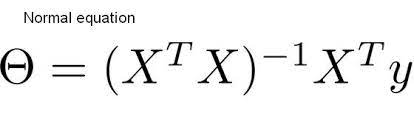


In [456]:
from numpy.linalg import inv

X_train_transpose = np.transpose(X_train_mat)
theta = np.matmul(np.matmul(inv(np.matmul(X_train_transpose, X_train_mat)),X_train_transpose),y_train)

X_train_transpose = np.transpose(X_train_mat_scaled)
theta_scaled = np.matmul(np.matmul(inv(np.matmul(X_train_transpose, X_train_mat_scaled)),X_train_transpose),y_train)

# with non scaled train set
print(theta)
print('='*50)
# with scaled train set
print(theta_scaled)

[-1.11468397  0.21383338]
[0.42491634 0.57948845]


### Plotting Predictor fucntion on scatter plot of data set

In [457]:
def predict(theta, data):
  return np.matmul(data,theta)

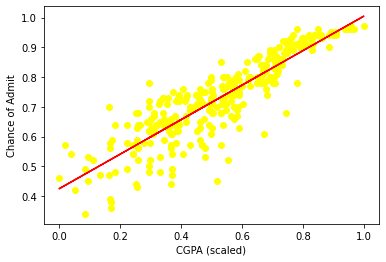

In [460]:
# scatter plot of training set
plt.scatter(X_train_scaled['CGPA'], y_train,c='yellow')

# predictor function (a line)
plt.plot(X_train_scaled['CGPA'], predict(theta_scaled, X_train_mat_scaled), c='r')

plt.xlabel('CGPA (scaled)')
plt.ylabel('Chance of Admit')
plt.show()

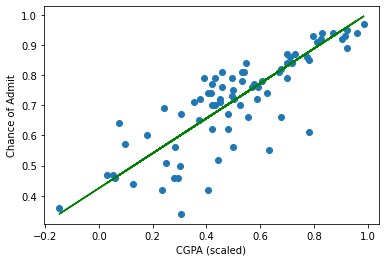

In [459]:
# scatter plot of test set
plt.scatter(X_test_scaled['CGPA'], y_test)

# output of predictor function (a line)
plt.plot(X_test_scaled['CGPA'], predict(theta_scaled, X_test_mat_scaled), c='green')

plt.xlabel('CGPA (scaled)')
plt.ylabel('Chance of Admit')
plt.show()

### Evaluating the model

In [461]:
from sklearn.metrics import mean_squared_error,explained_variance_score

In [467]:
predictions_scaled = predict(theta_scaled, X_test_mat_scaled)
predictions = predict(theta, X_test_mat)

### evaluation without scaling

In [468]:
np.sqrt(mean_squared_error(y_test,predictions))

0.09045138251027383

In [469]:
explained_variance_score(y_test,predictions)

0.6677899101214568

### evaluation with scaling

In [470]:
np.sqrt(mean_squared_error(y_test,predictions_scaled))

0.09045138251027812

In [471]:
explained_variance_score(y_test,predictions_scaled)

0.6677899101214164

### Using Scikit Learn (only scaled values)

In [472]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(pd.DataFrame(X_train_scaled['CGPA']), y_train)
predictions = reg.predict(pd.DataFrame(X_test_scaled['CGPA']))
predictions

array([0.72855973, 0.7584964 , 0.57032303, 0.45485301, 0.33938299,
       0.5874297 , 0.98088311, 0.71359139, 0.69006972, 0.81409308,
       0.95522311, 0.9295631 , 0.71145306, 0.66868638, 0.66868638,
       0.63019638, 0.66868638, 0.71145306, 0.77560307, 0.67510138,
       0.83119975, 0.59598304, 0.68151639, 0.5617697 , 0.7456664 ,
       0.46768301, 0.65157971, 0.60239804, 0.94880811, 0.75421973,
       0.87758215, 0.76704974, 0.7649114 , 0.6002597 , 0.84189142,
       0.73711306, 0.74138973, 0.95949977, 0.69006972, 0.83119975,
       0.90604143, 0.81836975, 0.44202301, 0.70289972, 0.9039031 ,
       0.95949977, 0.89534976, 0.45912968, 0.60239804, 0.66013305,
       0.66013305, 0.78843307, 0.56604636, 0.99585145, 0.83119975,
       0.58956803, 0.88679643, 0.71572973, 0.71359139, 0.68579305,
       0.87396642, 0.7328364 , 0.49761968, 0.64302638, 0.67510138,
       0.66654805, 0.48051301, 0.87824309, 0.81836975, 0.64088804,
       0.70289972, 0.7328364 , 0.84830642, 0.83761475, 0.79270

### Plotting

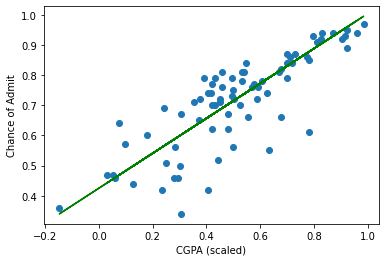

In [473]:
# scatter plot of test set
plt.scatter(X_test_scaled['CGPA'], y_test)

# output of predictor function (a line)
plt.plot(X_test_scaled['CGPA'], predictions, c='green')

plt.xlabel('CGPA (scaled)')
plt.ylabel('Chance of Admit')
plt.show()

### Evaluation

In [474]:
np.sqrt(mean_squared_error(y_test,predictions))

0.0904513825102781

In [475]:
explained_variance_score(y_test,predictions)

0.6677899101214171

## Training Model with 3 features

### we choose 'CGPA', 'GRE Score' and 'TOEFL Score' as 3 features

In [476]:
reg = LinearRegression().fit(X_train_scaled[['GRE Score', 'TOEFL Score', 'CGPA']], y_train)
predictions = reg.predict(X_test_scaled[['GRE Score', 'TOEFL Score', 'CGPA']])
predictions

array([0.72476773, 0.7643534 , 0.5342631 , 0.44751534, 0.37978076,
       0.57304369, 0.96023504, 0.66088914, 0.70831422, 0.82484739,
       0.95674097, 0.94112815, 0.71470286, 0.70452154, 0.64136751,
       0.60490541, 0.67420525, 0.72856302, 0.77018938, 0.66693167,
       0.85062006, 0.63085835, 0.71143778, 0.55739525, 0.74016375,
       0.5219926 , 0.65283892, 0.57636422, 0.96237998, 0.74908767,
       0.81904258, 0.77253129, 0.76489842, 0.6155005 , 0.84812869,
       0.75195882, 0.73698113, 0.97726659, 0.70916712, 0.8246062 ,
       0.93311258, 0.77436641, 0.44578611, 0.71441482, 0.90817233,
       0.96429495, 0.92519168, 0.44287934, 0.56858124, 0.65159768,
       0.66640753, 0.76246544, 0.57635597, 0.99308857, 0.83587203,
       0.57115214, 0.89458898, 0.76120738, 0.73015433, 0.66447527,
       0.87896397, 0.73658623, 0.48019435, 0.63176064, 0.6642661 ,
       0.68473268, 0.51160309, 0.86483919, 0.8176527 , 0.6474411 ,
       0.66330993, 0.74884745, 0.85464403, 0.82678579, 0.80463

### Plotting

#### how ??   :)

### Evaluation

#### as results below shows, MSE is lower than former part which means our model is predicting better

In [477]:
np.sqrt(mean_squared_error(y_test,predictions))

0.08369232434585369

In [478]:
explained_variance_score(y_test,predictions)

0.7163603184884166

## Training Model with all features of training set

In [479]:
reg = LinearRegression().fit(X_train_scaled, y_train)
predictions = reg.predict(X_test_scaled)
predictions

array([0.69258208, 0.81044288, 0.51310898, 0.45419164, 0.41815956,
       0.58656033, 0.96835885, 0.66388966, 0.73442086, 0.79897339,
       0.94701322, 0.95539983, 0.71502732, 0.74225043, 0.67048096,
       0.60906844, 0.64987854, 0.72660227, 0.78182432, 0.70040323,
       0.83204485, 0.65202882, 0.7370366 , 0.56705457, 0.71456166,
       0.54450931, 0.66018763, 0.59050255, 0.95158175, 0.75348727,
       0.7898388 , 0.7682848 , 0.72111588, 0.63795012, 0.81181554,
       0.78457268, 0.73335528, 0.93813201, 0.64606667, 0.81306901,
       0.93743907, 0.80528176, 0.48915406, 0.69371513, 0.89432217,
       0.96177364, 0.92125878, 0.44221111, 0.57322734, 0.61250893,
       0.70244802, 0.77584558, 0.55531143, 0.99406201, 0.80993688,
       0.54892312, 0.90795649, 0.76566316, 0.75064753, 0.63427477,
       0.90600008, 0.77946092, 0.50299323, 0.64243595, 0.6647382 ,
       0.68195785, 0.50693471, 0.83263111, 0.80717519, 0.63238343,
       0.65395333, 0.72136173, 0.86819596, 0.85715903, 0.78372

### Plotting

#### how ??   :)

### Evaluation

#### as results below shows, MSE is lower than former part which means our model is predicting better

In [480]:
np.sqrt(mean_squared_error(y_test,predictions))

0.08358009329950628

In [481]:
explained_variance_score(y_test,predictions)

0.7176123476324897

# Section 2

Text(0, 0.5, 'y')

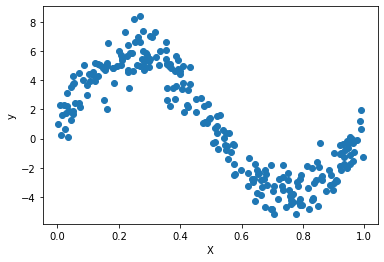

In [553]:
sample_size = 250
X = np.random.uniform(size=sample_size)
y = 5 * np.sin(X * 2 * np.pi)
y = y + np.random.normal(size=sample_size, loc=1)

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

#### degree 1

In [554]:
df = pd.DataFrame(np.c_[np.ones(sample_size), X], columns=[0,1])
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(x_train, y_train)
predictions = reg.predict(x_test)
predictions

array([ 0.61769011,  0.46072229, -0.72833526, -1.62192209, -2.27640484,
       -1.60570721, -1.476459  ,  2.92056214,  0.58934919,  0.78588829,
       -2.02783539,  4.5951792 ,  0.3673053 ,  2.36931121,  4.96048032,
       -1.95898172, -1.29550704,  2.90646057, -2.53957122, -2.1688737 ,
        3.24564127, -2.62729529,  2.36335708,  3.98669426,  4.14335618,
       -2.00890816,  2.05375695,  0.92388252, -1.85159808, -2.6823509 ,
       -2.48294564,  4.37512821,  3.86681277,  3.18133054,  2.27430578,
       -3.2352096 ,  5.37627359, -0.7958815 , -3.3233023 , -1.32421993,
        2.73017141,  5.33541361, -2.50702713, -1.38765538,  2.13867321,
        1.67945028, -2.22970983,  5.3569532 , -0.30828052,  3.72923746])

Plotting

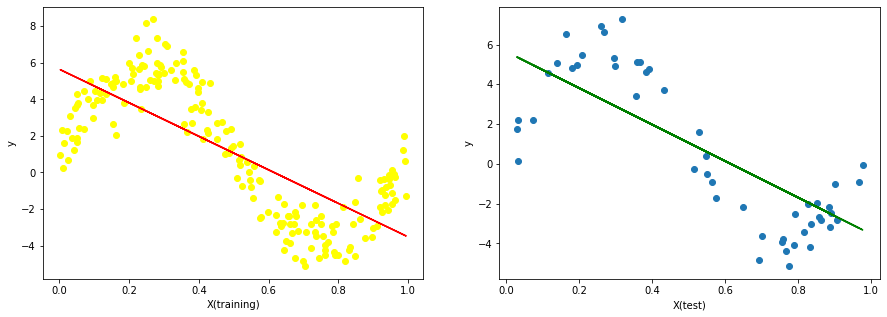

In [555]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# scatter plot of training set
axes[0].scatter(x_train[1], y_train, c='yellow')

# output of predictor function (a line)
axes[0].plot(x_train[1], reg.predict(x_train), c='red')

# scatter plot of test set
axes[1].scatter(x_test[1], y_test)

# output of predictor function (a line)
axes[1].plot(x_test[1], predictions, c='green')

axes[0].set_xlabel('X(training)')
axes[0].set_ylabel('y')
axes[1].set_xlabel('X(test)')
axes[1].set_ylabel('y')
plt.show()

Evaluation

In [556]:
np.sqrt(mean_squared_error(y_test,predictions))

2.311930312739546

In [557]:
explained_variance_score(y_test,predictions)

0.6315179944803155

#### Degree 3

In [558]:
df[2], df[3] = np.power(X, 2), np.power(X, 3)

#split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

#scaling
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train) + np.array([[1,0,0,0]])
x_test = scaler.transform(x_test) + np.array([[1,0,0,0]])

#regression
reg = LinearRegression().fit(x_train, y_train)
predictions = reg.predict(x_test)
predictions

array([-0.16567952, -0.58882331, -3.17451456, -3.81358561, -3.18341227,
       -3.81607408, -3.81532652,  5.34168234, -0.2428181 ,  0.29731986,
       -3.55047411,  4.66727163, -0.8351824 ,  4.40078608,  3.54357414,
       -3.62345188, -3.75539298,  5.32300125, -2.60701417, -3.36256302,
        5.68037327, -2.36937323,  4.38851566,  5.67405018,  5.51007372,
       -3.57174044,  3.70027632,  0.68183921, -3.71354301, -2.2081625 ,
       -2.74809086,  5.14913131,  5.75830684,  5.6280016 ,  4.20038752,
       -0.04063977,  1.7272745 , -3.27173669,  0.40241297, -3.7693166 ,
        5.06389134,  1.93269381, -2.68926237, -3.79424867,  3.89823401,
        2.76135826, -3.26510172,  1.82516042, -2.42802245,  5.81301162])

Plotting

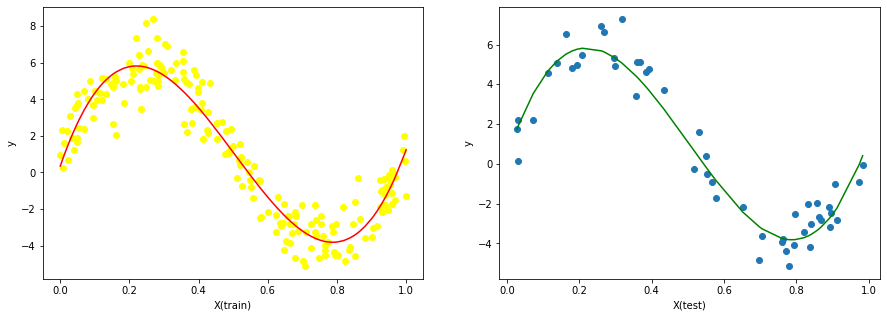

In [559]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# scatter plot of train set
axes[0].scatter(np.transpose(x_train)[1], y_train, c='yellow')

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_train)[1], reg.predict(x_train)), key=lambda x: x[0])))
axes[0].plot(unziped[0], unziped[1], c='red')

# scatter plot of test set
axes[1].scatter(np.transpose(x_test)[1], y_test)

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_test)[1], predictions), key=lambda x: x[0])))
axes[1].plot(unziped[0], unziped[1], c='green')


axes[1].set_xlabel('X(test)')
axes[1].set_ylabel('y')
axes[0].set_xlabel('X(train)')
axes[0].set_ylabel('y')
plt.show()


Evaluation

In [560]:
np.sqrt(mean_squared_error(y_test,predictions))

0.896859000326117

In [561]:
explained_variance_score(y_test,predictions)

0.9448227888994356

### Degree 7

In [562]:
df_mat = np.c_[df.to_numpy(), df.to_numpy() * np.c_[np.power(X, 4)]]
print(df_mat.shape)
#split
x_train, x_test, y_train, y_test = train_test_split(df_mat, y, test_size=0.2, random_state=42)

# #scaling
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train) + np.array([[1,0,0,0,0,0,0,0]])
x_test = scaler.transform(x_test) + np.array([[1,0,0,0,0,0,0,0]])

#regression
reg = LinearRegression().fit(x_train, y_train)
predictions = reg.predict(x_test)
predictions

(250, 8)


array([-0.44876458, -0.95106206, -3.45883733, -3.503182  , -2.74716977,
       -3.51465218, -3.5918828 ,  5.62507943, -0.5413158 ,  0.11406676,
       -3.09867324,  4.12519436, -1.23655033,  4.91444059,  3.32344737,
       -3.18236762, -3.65487448,  5.61559868, -2.28336266, -2.90881267,
        5.71922353, -2.10352649,  4.90303938,  5.1543919 ,  4.92729172,
       -3.12226939,  4.21013627,  0.58858083, -3.30095608, -1.98294491,
       -2.39217009,  4.54104086,  5.30685652,  5.71913326,  4.72355021,
       -0.26999284,  2.13774902, -3.51613174,  0.13003   , -3.64858051,
        5.45832288,  2.27429347, -2.3465564 , -3.62964701,  4.41896553,
        3.14617113, -2.81919889,  2.20301236, -2.88588807,  5.45618024])

plotting

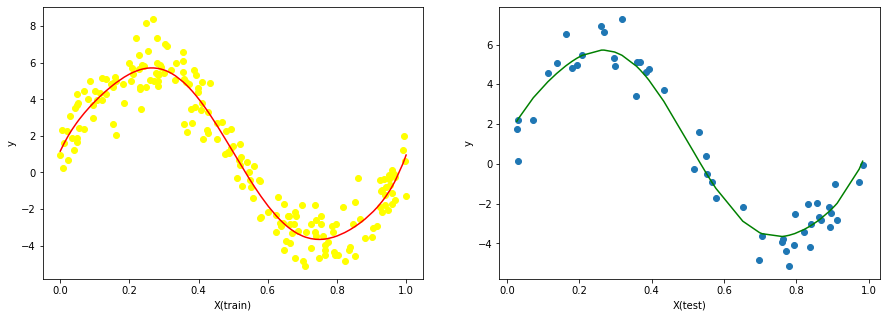

In [563]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# scatter plot of train set
axes[0].scatter(np.transpose(x_train)[1], y_train, c='yellow')

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_train)[1], reg.predict(x_train)), key=lambda x: x[0])))
axes[0].plot(unziped[0], unziped[1], c='red')

# scatter plot of test set
axes[1].scatter(np.transpose(x_test)[1], y_test)

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_test)[1], predictions), key=lambda x: x[0])))
axes[1].plot(unziped[0], unziped[1], c='green')


axes[1].set_xlabel('X(test)')
axes[1].set_ylabel('y')
axes[0].set_xlabel('X(train)')
axes[0].set_ylabel('y')
plt.show()

Evaluation

In [564]:
np.sqrt(mean_squared_error(y_test,predictions))

0.8435844013193028

In [565]:
explained_variance_score(y_test,predictions)

0.9508225456808879

### Degree 11

In [566]:
df_mat = np.c_[df_mat, df.to_numpy() * np.c_[np.power(X, 8)]]
print(df_mat.shape)
#split
x_train, x_test, y_train, y_test = train_test_split(df_mat, y, test_size=0.2, random_state=42)

# #scaling
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train) + np.array([[1,0,0,0,0,0,0,0,0,0,0,0]])
x_test = scaler.transform(x_test) + np.array([[1,0,0,0,0,0,0,0,0,0,0,0]])

#regression
reg = LinearRegression().fit(x_train, y_train)
predictions = reg.predict(x_test)
predictions

(250, 12)


array([-0.41751041, -0.8863116 , -3.45156396, -3.45645209, -3.0154364 ,
       -3.46525587, -3.53103793,  5.85500659, -0.50307193,  0.09729028,
       -3.21684442,  4.13479116, -1.15852234,  5.00996721,  3.57656686,
       -3.26069255, -3.60069526,  5.84667119, -2.61668454, -3.1144322 ,
        5.8443441 , -2.40791652,  4.99574615,  4.86183501,  4.6367666 ,
       -3.22916828,  4.15387897,  0.5275201 , -3.32537122, -2.25194684,
       -2.7281135 ,  4.35980137,  5.04877652,  5.8761622 ,  4.77301701,
        0.15706146,  2.06420121, -3.50811699,  0.41931899, -3.59207861,
        5.68000944,  2.25340639, -2.68279285, -3.56948161,  4.40203397,
        2.97245796, -3.06143702,  2.15406805, -2.8431761 ,  5.26728417])

Plotting

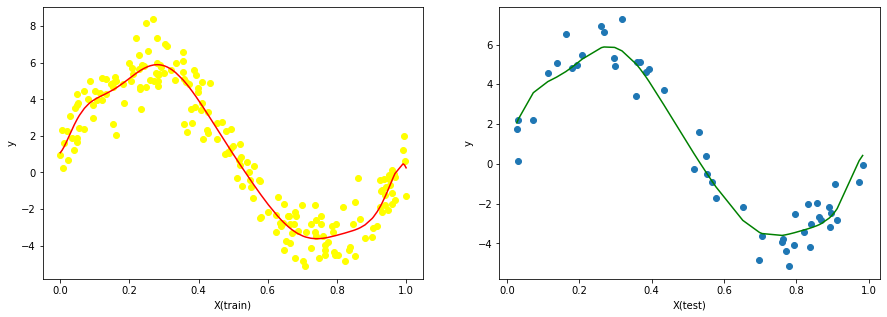

In [567]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# scatter plot of train set
axes[0].scatter(np.transpose(x_train)[1], y_train, c='yellow')

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_train)[1], reg.predict(x_train)), key=lambda x: x[0])))
axes[0].plot(unziped[0], unziped[1], c='red')

# scatter plot of test set
axes[1].scatter(np.transpose(x_test)[1], y_test)

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_test)[1], predictions), key=lambda x: x[0])))
axes[1].plot(unziped[0], unziped[1], c='green')


axes[1].set_xlabel('X(test)')
axes[1].set_ylabel('y')
axes[0].set_xlabel('X(train)')
axes[0].set_ylabel('y')
plt.show()

evaluation

In [568]:
np.sqrt(mean_squared_error(y_test,predictions))

0.881551820578715

In [569]:
explained_variance_score(y_test,predictions)

0.9462987182411725

### Degree 16

In [570]:
df_mat = np.c_[df_mat, df.to_numpy() * np.c_[np.power(X, 12)], np.c_[np.power(X, 16)]]
print(df_mat.shape)
#split
x_train, x_test, y_train, y_test = train_test_split(df_mat, y, test_size=0.2, random_state=42)

# #scaling
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train) + np.array([[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
x_test = scaler.transform(x_test) + np.array([[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

#regression
reg = LinearRegression().fit(x_train, y_train)
predictions = reg.predict(x_test)
predictions

(250, 17)


array([-0.43217504, -0.98086296, -3.29527202, -3.67025284, -2.84724929,
       -3.66796681, -3.6274259 ,  5.8998972 , -0.5323325 ,  0.16409465,
       -3.3783295 ,  4.23037718, -1.29606563,  4.87261406,  3.74797048,
       -3.48274259, -3.53565574,  5.88559829, -2.23081956, -3.09994992,
        5.97490945, -2.0588821 ,  4.8579495 ,  4.68105836,  4.43387201,
       -3.40929799,  4.05209525,  0.64703609, -3.59878622, -1.95892113,
       -2.3527391 ,  4.25929094,  4.92288238,  6.00088629,  4.63392284,
        0.42545063,  1.94069288, -3.32252477,  0.96099364, -3.55106946,
        5.64210613,  2.11370526, -2.29982744, -3.58467209,  4.27958725,
        3.01462247, -2.95970524,  2.0205724 , -2.94858473,  5.22400794])

Plotting


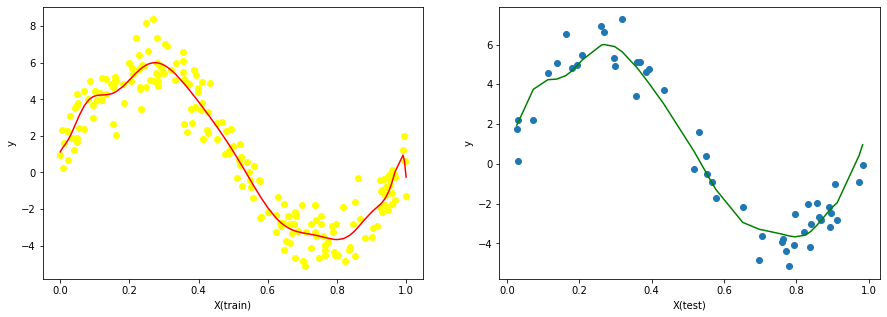

In [571]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# scatter plot of train set
axes[0].scatter(np.transpose(x_train)[1], y_train, c='yellow')

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_train)[1], reg.predict(x_train)), key=lambda x: x[0])))
axes[0].plot(unziped[0], unziped[1], c='red')

# scatter plot of test set
axes[1].scatter(np.transpose(x_test)[1], y_test)

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_test)[1], predictions), key=lambda x: x[0])))
axes[1].plot(unziped[0], unziped[1], c='green')


axes[1].set_xlabel('X(test)')
axes[1].set_ylabel('y')
axes[0].set_xlabel('X(train)')
axes[0].set_ylabel('y')
plt.show()

Evaluation

In [572]:
np.sqrt(mean_squared_error(y_test,predictions))

0.9113820720770105

In [573]:
explained_variance_score(y_test,predictions)

0.9425840690471553

### Degree 20

In [574]:
df_mat = np.c_[df_mat, df.to_numpy() * np.c_[np.power(X, 17)]]
print(df_mat.shape)
#split
x_train, x_test, y_train, y_test = train_test_split(df_mat, y, test_size=0.2, random_state=42)

# #scaling
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train) + np.array([[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
x_test = scaler.transform(x_test) + np.array([[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

#regression
reg = LinearRegression().fit(x_train, y_train)
predictions = reg.predict(x_test)
predictions

(250, 21)


array([-0.32967271, -0.90205061, -3.11734547, -3.67839731, -3.07520761,
       -3.69588591, -3.77492704,  5.88166973, -0.42988627,  0.2319605 ,
       -3.11628522,  4.21254685, -1.25587143,  4.82640658,  3.74233292,
       -3.18198003, -3.69409718,  5.8618966 , -2.79821481, -3.0681733 ,
        6.03739633, -2.49183549,  4.81383028,  4.63105042,  4.45415804,
       -3.12972535,  4.10875817,  0.65682342, -3.33324422, -2.24343194,
       -2.93452348,  4.32797257,  4.84047008,  6.06018215,  4.62293076,
       -0.05421151,  1.8373362 , -3.14318882,  0.93741904, -3.7195126 ,
        5.56185298,  2.0368964 , -2.88390626, -3.76094897,  4.3159674 ,
        3.02249458, -3.07154073,  1.92736979, -3.02632844,  5.14596481])

Plotting

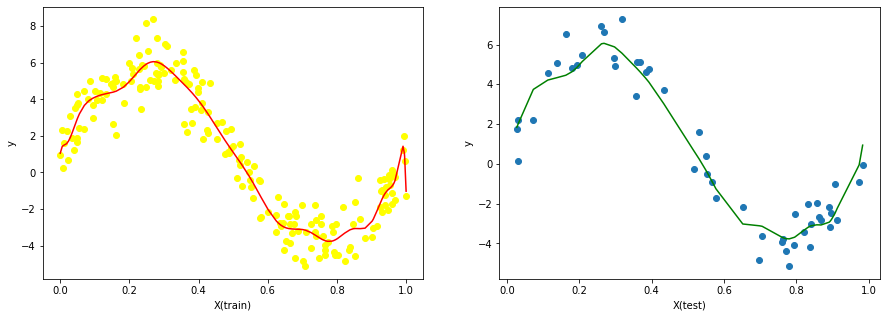

In [575]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# scatter plot of train set
axes[0].scatter(np.transpose(x_train)[1], y_train, c='yellow')

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_train)[1], reg.predict(x_train)), key=lambda x: x[0])))
axes[0].plot(unziped[0], unziped[1], c='red')

# scatter plot of test set
axes[1].scatter(np.transpose(x_test)[1], y_test)

# output of predictor function (a line)
unziped = list(zip(*sorted(zip(np.transpose(x_test)[1], predictions), key=lambda x: x[0])))
axes[1].plot(unziped[0], unziped[1], c='green')


axes[1].set_xlabel('X(test)')
axes[1].set_ylabel('y')
axes[0].set_xlabel('X(train)')
axes[0].set_ylabel('y')
plt.show()

Evaluation

In [576]:
np.sqrt(mean_squared_error(y_test,predictions))

0.8919853498173536

In [577]:
explained_variance_score(y_test,predictions)

0.9452024289139631